# NBA Games Analysis
## Predicting team winning percentage

## <font color = 'blue'>Import libraries and read data</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
game_data = pd.read_csv("../NBA dataset/games.csv")

In [3]:
game_detail_data = pd.read_csv("../NBA dataset/games_details.csv")

In [4]:
players = pd.read_csv("../NBA dataset/players.csv")

In [5]:
rank_data = pd.read_csv("../NBA dataset/ranking.csv")

In [6]:
teams_data = pd.read_csv("../NBA dataset/teams.csv")

## <font color='blue'>Check the data</font>

In [7]:
game_data.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [8]:
game_detail_data.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

## <font color='blue'>Data Cleansing</font>
#### Let's remove unnecessary columns and combine data for simplicity.

In [9]:
# Remove rows whose Leauge_ID != 0 since our focus is only for NBA league.
rank_data = rank_data[rank_data['LEAGUE_ID'] == 0]
teams_data = teams_data[teams_data['LEAGUE_ID'] == 0]

In [10]:
games = game_data[['GAME_ID', 'SEASON', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'PTS_home', \
                  'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away', \
                  'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']]
game_detail = game_detail_data[['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PLAYER_ID', 'PLAYER_NAME', 'MIN', \
                                'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', \
                                'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']]

In [11]:
rank = rank_data[['TEAM_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE', 'TEAM', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', \
                 'ROAD_RECORD']]

In [12]:
teams = teams_data[['TEAM_ID', 'ABBREVIATION', 'NICKNAME']]
teams.head()

,TEAM_ID,ABBREVIATION,NICKNAME
0,1610612737,ATL,Hawks
1,1610612738,BOS,Celtics
2,1610612740,NOP,Pelicans
3,1610612741,CHI,Bulls
4,1610612742,DAL,Mavericks


In [13]:
games.head()

,GAME_ID,SEASON,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,12000047,2020,Final,1610612753,1610612766,120.0,0.433,0.792,0.425,23.0,50.0,117.0,0.444,0.864,0.439,21.0,52.0,1
1,12000048,2020,Final,1610612764,1610612765,99.0,0.427,0.625,0.295,24.0,45.0,96.0,0.402,0.647,0.326,18.0,51.0,1
2,12000049,2020,Final,1610612763,1610612737,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0,0
3,12000039,2020,Final,1610612754,1610612755,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0,0
4,12000040,2020,Final,1610612761,1610612748,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0,0


In [14]:
# replace all team ids to actual team abbreviations
def id_to_abb(df, team_id_lst):
    for idx, val in enumerate(team_id_lst):
        team_id_lst[idx] = teams[teams['TEAM_ID'] == val].iloc[0,1] #replace with abbriviation

In [15]:
id_to_abb(games, games['HOME_TEAM_ID'])
id_to_abb(games, games['VISITOR_TEAM_ID'])
games

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1024: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[

,GAME_ID,SEASON,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,12000047,2020,Final,ORL,CHA,120.0,0.433,0.792,0.425,23.0,50.0,117.0,0.444,0.864,0.439,21.0,52.0,1
1,12000048,2020,Final,WAS,DET,99.0,0.427,0.625,0.295,24.0,45.0,96.0,0.402,0.647,0.326,18.0,51.0,1
2,12000049,2020,Final,MEM,ATL,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0,0
3,12000039,2020,Final,IND,PHI,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0,0
4,12000040,2020,Final,TOR,MIA,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,11400007,2014,Final,ATL,NOP,93.0,0.419,0.821,0.421,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1
23516,11400004,2014,Final,CHI,WAS,81.0,0.338,0.719,0.381,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0
23517,11400005,2014,Final,LAL,DEN,98.0,0.448,0.682,0.500,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1
23518,11400002,2014,Final,TOR,SAC,99.0,0.440,0.771,0.333,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1


In [16]:
game_detail.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,12000047,1610612766,CHA,1628998,Cody Martin,17:06,0.0,2.0,0.000,0.0,...,0.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0,-31.0
1,12000047,1610612766,CHA,1629023,P.J. Washington,24:58,4.0,17.0,0.235,0.0,...,1.0,6.0,7.0,2.0,2.0,1.0,5.0,3.0,9.0,-2.0
2,12000047,1610612766,CHA,203469,Cody Zeller,22:45,5.0,8.0,0.625,1.0,...,2.0,2.0,4.0,0.0,0.0,1.0,0.0,2.0,13.0,-23.0
3,12000047,1610612766,CHA,1628984,Devonte' Graham,31:30,8.0,15.0,0.533,6.0,...,1.0,3.0,4.0,3.0,2.0,0.0,4.0,0.0,25.0,-7.0
4,12000047,1610612766,CHA,1626179,Terry Rozier,26:48,8.0,14.0,0.571,5.0,...,1.0,4.0,5.0,6.0,1.0,0.0,0.0,2.0,24.0,22.0


In [17]:
rank

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612747,12020,2020-12-21,West,L.A. Lakers,4,4,0,1.000,2-0,2-0
1,1610612762,12020,2020-12-21,West,Utah,3,3,0,1.000,2-0,1-0
2,1610612740,12020,2020-12-21,West,New Orleans,2,2,0,1.000,1-0,1-0
3,1610612745,12020,2020-12-21,West,Houston,4,3,1,0.750,2-0,1-1
4,1610612763,12020,2020-12-21,West,Memphis,4,3,1,0.750,1-1,2-0
...,...,...,...,...,...,...,...,...,...,...,...
188378,1610612765,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29
188379,1610612738,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32
188380,1610612753,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37
188381,1610612755,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32


In [18]:
players.head()

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


## <font color='blue'>Winning Percentage of each Team</font>
#### First, let's see how home advantage affects to the winning percentage

In [19]:
games['HOME_TEAM_WINS'].value_counts()

1    13901
0     9619
Name: HOME_TEAM_WINS, dtype: int64

#### Looks like home advantage contributes to the home team pretty well.
#### Now let's filter out each home team and compute their average stats.

In [20]:
home_stat_mean = games.groupby('HOME_TEAM_ID')['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', \
                                         'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', \
                                         'AST_away', 'REB_away', 'HOME_TEAM_WINS'].mean()

home_stat_mean.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
HOME_TEAM_ID,,,,,,,,,,,,,
ATL,101.177003,0.457908,0.760776,0.348802,23.630491,42.279070,100.065891,0.452429,0.757187,0.351919,22.100775,42.290698,0.559278
BKN,99.138562,0.447277,0.756987,0.344021,22.398693,42.605229,99.730719,0.451633,0.756024,0.356447,21.687582,42.392157,0.492848
BOS,101.227818,0.463163,0.772813,0.354759,23.520384,42.190647,96.770983,0.438044,0.750150,0.329669,20.593525,41.583933,0.635603
CHA,99.331903,0.443375,0.751505,0.347402,22.015737,42.288984,99.211731,0.450735,0.754090,0.345070,21.703863,42.570815,0.496423
CHI,99.071788,0.442024,0.759232,0.356385,22.892947,45.158690,97.005038,0.437826,0.750103,0.340018,21.147355,42.527708,0.580201


### Let's visualize each home teams' average counts of home team wins

Text(0.5, 1.0, 'Avg counts of Home Team Wins in NBA (2003~2020)')

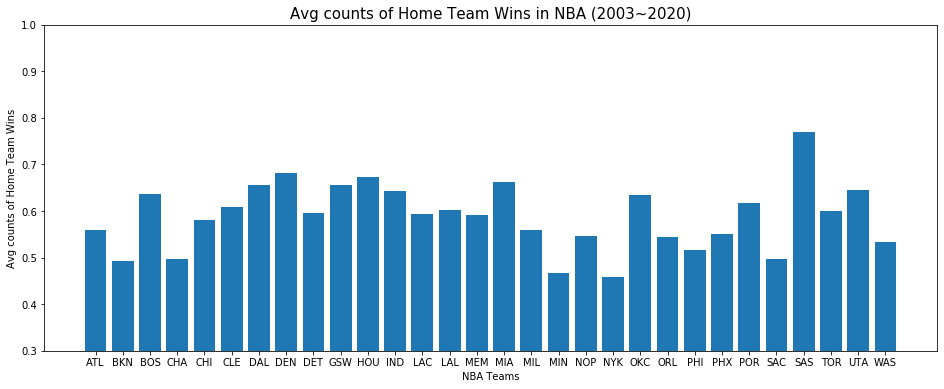

In [21]:
#hm_team_w = home_stat_mean[['HOME_TEAM_ID', 'HOME_TEAM_WINS']]
plt.figure(figsize=(16,6))
plt.bar(home_stat_mean.index, home_stat_mean['HOME_TEAM_WINS'])
plt.ylim(0.3, 1)
plt.xlabel("NBA Teams")
plt.ylabel("Avg counts of Home Team Wins")
plt.title("Avg counts of Home Team Wins in NBA (2003~2020)", fontsize=15)

### From 2003 to 2020 season, it appears San Antonio Spurs has the highest average counts of home team wins. 

### Now let's find how each team has done from 2003 to 2019 season. 

In [22]:
#We're droping 2020 season since 2020 data is not completed in this dataset.

hm_vs_awyStats = games[games['SEASON'] != 2020].groupby(['SEASON', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID']) \
                                        ['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', \
                                         'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', \
                                         'AST_away', 'REB_away'].mean()
hm_vs_awyStats

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


PTS_home  FG_PCT_home  FT_PCT_home  \
SEASON HOME_TEAM_ID VISITOR_TEAM_ID                                         
2003   ATL          BKN              107.000000       0.4850     0.812000   
                    BOS              101.500000       0.4805     0.836000   
                    CHI               97.000000       0.4410     0.805000   
                    CLE               91.333333       0.4030     0.851333   
                    DAL              102.000000       0.4630     0.697000   
...                                         ...          ...          ...   
2019   WAS          PHX              112.000000       0.4620     0.870000   
                    POR              103.000000       0.4220     0.640000   
                    SAC              106.000000       0.4570     0.750000   
                    SAS              138.000000       0.5870     0.800000   
                    UTA              116.000000       0.5050     0.882000   

                                     FG3_PCT_home   AST_home   REB_home  \
SEASON HOME_TEAM_ID VISITOR_TEAM_ID                                       
2003   ATL          BKN                  0.506500  24.500000  37.000000   
                    BOS                  0.374500  23.500000  45.000000   
                    CHI                  0.384000  20.000000  44.500000   
                    CLE                  0.348667  20.666667  43.666667   
                    DAL                  0.200000  23.000000  50.000000   
...                                           ...        ...        ...   
2019   WAS          PHX                  0.364000  18.000000  36.000000   
                    POR                  0.333000  19.000000  41.000000   
                    SAC                  0.382000  29.000000  45.000000   
                    SAS                  0.600000  37.000000  38.000000   
                    UTA                  0.318000  28.000000  37.000000   

                                       PTS_away  FG_PCT_away  FT_PCT_away  \
SEASON HOME_TEAM_ID VISITOR_TEAM_ID                                         
2003   ATL          BKN              103.500000     0.486500     0.785500   
                    BOS               93.500000     0.438000     0.713000   
                    CHI               87.500000     0.412500     0.668000   
                    CLE               91.333333     0.422667     0.714667   
                    DAL               96.000000     0.421000     0.688000   
...                                         ...          ...          ...   
2019   WAS          PHX              125.000000     0.525000     0.938000   
                    POR              122.000000     0.511000     0.788000   
                    SAC              113.000000     0.481000     0.857000   
                    SAS              132.000000     0.527000     0.759000   
                    UTA              127.000000     0.533000     0.840000   

                                     FG3_PCT_away  AST_away  REB_away  
SEASON HOME_TEAM_ID VISITOR_TEAM_ID                                    
2003   ATL          BKN                  0.436500      24.5      38.0  
                    BOS                  0.362000      20.0      33.0  
                    CHI                  0.231500      19.0      40.5  
                    CLE                  0.315333      21.0      46.0  
                    DAL                  0.192000      20.0      48.0  
...                                           ...       ...       ...  
2019   WAS          PHX                  0.344000      29.0      37.0  
                    POR                  0.240000      16.0      41.0  
                    SAC                  0.355000      22.0      39.0  
                    SAS                  0.375000      32.0      41.0  
                    UTA                  0.333000      24.0      44.0  

[14472 rows x 12 columns]

### Let's pick one team, in this case San Antonio Spurs, and analyze how Spurs has done through the past seasons.

In [23]:
d = dict()
for yr in range(2003, 2020):
    pts_diff = round((hm_vs_awyStats.loc[yr, 'SAS']['PTS_home']) - (hm_vs_awyStats.loc[yr, 'SAS']['PTS_away']), 2)
    d[yr] = pts_diff
spurs_stats = pd.DataFrame(d)
spurs_stats.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
ATL,39.0,16.0,24.0,14.0,15.0,6.0,15.0,16.0,22.0,2.0,2.0,-4.0,20.0,9.5,11.0,6.0,-1.0
BKN,23.0,16.0,5.0,16.0,11.0,3.0,12.0,10.0,NaN,31.0,21.0,12.0,27.0,29.0,12.0,3.0,4.0
BOS,16.0,17.0,12.0,-6.0,-2.0,-3.0,-7.0,-10.0,NaN,15.0,11.0,12.0,3.0,7.0,3.0,9.0,-20.0
CHA,NaN,17.0,28.0,-3.0,20.0,14.0,19.0,11.0,30.0,24.0,10.0,9.0,20.0,17.0,7.0,-15.0,24.0
CHI,11.0,3.0,-7.0,-7.5,15.0,10.0,-5.0,9.0,-7.0,18.0,-10.0,11.0,8.0,19.0,39.0,-5.0,NaN


#### Notice there are some NaNs in the df. Let's replace those with mean of each colomn and transpose the df

In [24]:
spurs_stats = spurs_stats.fillna(round(spurs_stats.mean(), 2)).T
spurs_stats.head()

,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,NYK,OKC,ORL,PHI,PHX,POR,SAC,TOR,UTA,WAS
2003,39.0,23.0,16.0,11.88,11.0,8.00,5.00,25.5,9.0,19.0,...,12.0,12.50,15.0,-6.0,15.00,17.5,6.5,3.0,6.5,22.0
2004,16.0,16.0,17.0,17.00,3.0,19.00,8.50,7.6,7.4,19.5,...,18.0,11.33,3.0,33.0,8.67,6.0,13.0,6.0,20.0,28.0
2005,24.0,5.0,12.0,28.00,-7.0,26.00,-4.00,3.5,-15.0,14.0,...,11.0,17.00,-12.0,9.0,6.00,25.5,9.0,5.0,33.0,1.5
2006,14.0,16.0,-6.0,-3.00,-7.5,4.33,4.33,2.0,1.0,26.5,...,8.0,25.00,9.5,5.0,4.20,15.0,5.5,16.0,14.8,13.0
2007,15.0,11.0,-2.0,20.00,15.0,-2.00,2.50,7.5,7.0,14.5,...,4.0,21.00,18.0,7.0,-1.80,15.0,14.5,-10.0,17.5,15.0


#### Let's focus how Spurs has done with LA Lakers.

([<matplotlib.axis.XTick at 0x1a1d4dd790>,
 <a list of 17 Text xticklabel objects>)

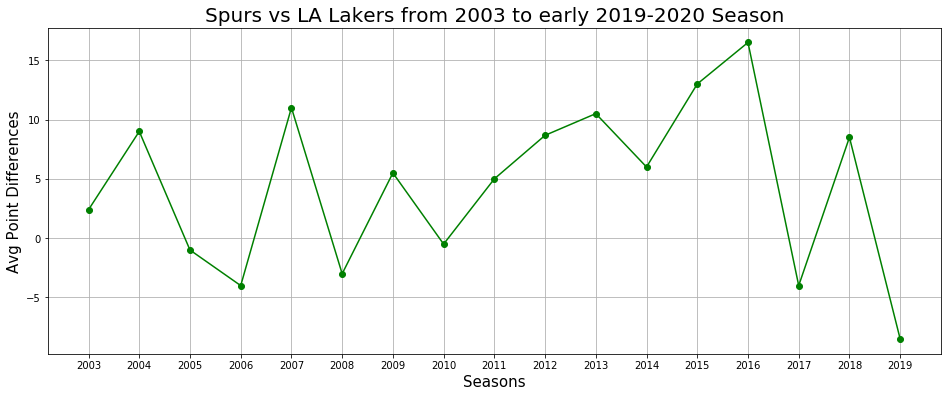

In [25]:
plt.figure(figsize=(16,6))
plt.plot(spurs_stats['LAL'], 'go-')
plt.grid()
plt.title("Spurs vs LA Lakers from 2003 to early 2019-2020 Season", fontsize=20)
plt.xlabel("Seasons", fontsize=15)
plt.ylabel("Avg Point Differences", fontsize=15)
plt.xticks(spurs_stats.index, fontsize=10)

<ul><b>Few interesting things from the above graph:</b>
    <li>Overall, it looks like Spurs has had Lakers the most of time except a few negative average point differences like in 2005, 2006, 2008, 2010, 2017, 2019(early season)</li>
    <li>From 2011 to 2016, the graph shows Spurs had increasing avg point difference with Lakers. There is one little break in 2014 but it is still positive. Probably having Kawhi Leonard gave Spurs a boost?</li>
    <li>2017 is when Spurs went to conference final where they lost 0-4. It is interesting fact that Spurs had the lowest average point difference with Lakers in this season.</li>
</ul>

#### Now let's visualize Spurs' overall average point difference between all teams throughout 2003 to early 2019 season!!

Text(0, 0.5, 'Avg PTS Differences')

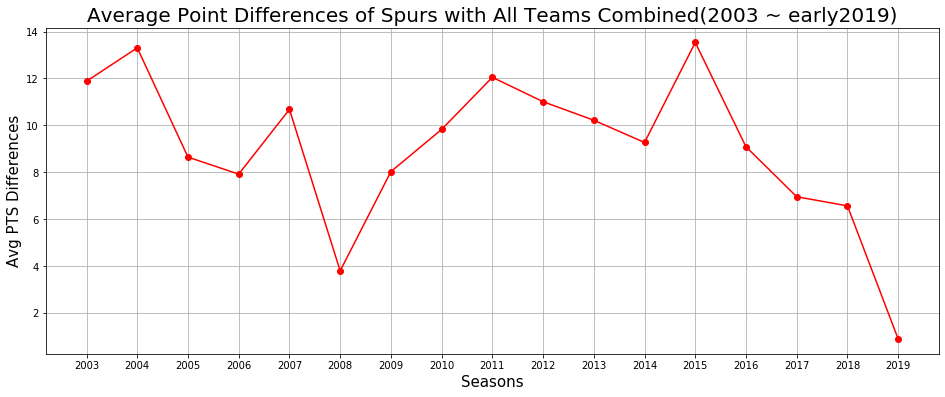

In [26]:
overall_spurs = spurs_stats.mean(axis=1)
plt.figure(figsize=(16,6))
plt.plot(overall_spurs, 'ro-')
plt.grid()
plt.xticks(overall_spurs.index)
plt.title("Average Point Differences of Spurs with All Teams Combined(2003 ~ early2019)", fontsize=20)
plt.xlabel("Seasons", fontsize=15)
plt.ylabel("Avg PTS Differences", fontsize=15)

<ul>
    <li>Looks like Spurs has had succesful seasons! All average points differences are way above zero except the early 2019 one. </li>
</ul>

### Let's see how does score trend from 2003 to 2019 season.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


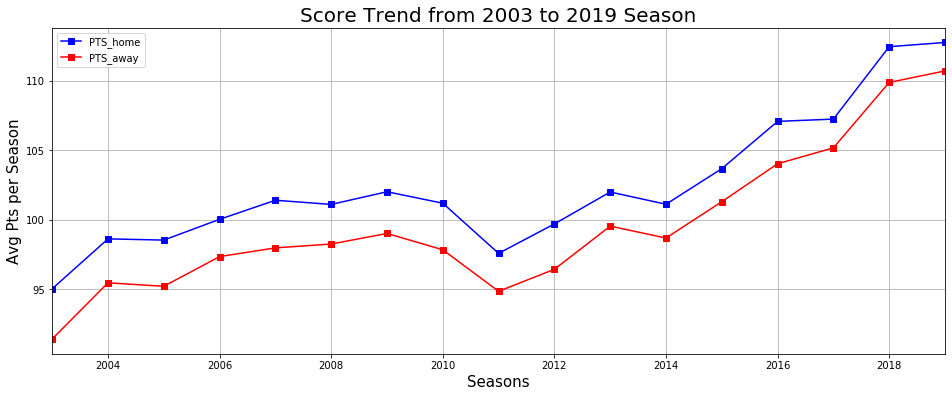

In [27]:
score_trend = hm_vs_awyStats.groupby('SEASON')['PTS_home', 'PTS_away'].mean()
plt.figure(figsize=(16,6))
plt.plot(score_trend.index, 'PTS_home', 'bs-', data=score_trend)
plt.plot(score_trend.index, 'PTS_away', 'rs-', data=score_trend)
plt.grid()
plt.xlim(2003, 2019)
plt.xlabel("Seasons",  fontsize=15)
plt.ylabel("Avg Pts per Season",  fontsize=15)
plt.title("Score Trend from 2003 to 2019 Season", fontsize=20)
plt.legend()

### Interesting Facts to Note from above Graph:
<ul>
    <li>The big dip in 2011 -2012 season is due to the NBA lockout incident.</li>
    <li>It is worth of noting that the dataset has unfinished 2019-2020 season, which might influence the accuracy of avg pts of 2019-2020 season.</li>
    <li><b>Except these special cases, the score trend from 2003 to 2019 season shows increasing score trend.</b></li>
    <li>Notice home teams' total average pts are always higher then those of away teams - <b>power of home advantage is real!!</b></li>
</ul>

### Let's figure out what has contributed to such increasing score trend in NBA.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


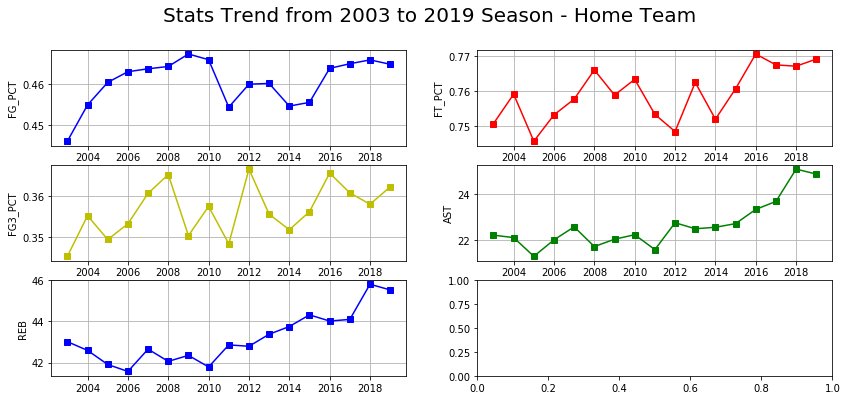

In [28]:
stats_trend_hm = hm_vs_awyStats.groupby('SEASON')['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', \
                                         'REB_home'].mean()
fig, axs = plt.subplots(3,2, figsize=(14,6))
fig.suptitle('Stats Trend from 2003 to 2019 Season - Home Team', fontsize=20)
axs[0, 0].plot(stats_trend_hm.index, 'FG_PCT_home', 'bs-', data=stats_trend_hm)
axs[0, 0].set(ylabel="FG_PCT")
axs[0, 0].grid()
axs[0, 1].plot(stats_trend_hm.index, 'FT_PCT_home', 'rs-', data=stats_trend_hm)
axs[0, 1].set(ylabel="FT_PCT")
axs[0, 1].grid()
axs[1, 0].plot(stats_trend_hm.index, 'FG3_PCT_home', 'ys-', data=stats_trend_hm)
axs[1, 0].set(ylabel="FG3_PCT")
axs[1, 0].grid()
axs[1, 1].plot(stats_trend_hm.index, 'AST_home', 'gs-', data=stats_trend_hm)
axs[1, 1].set(ylabel="AST")
axs[1, 1].grid()
axs[2, 0].plot(stats_trend_hm.index, 'REB_home', 'bs-', data=stats_trend_hm)
axs[2, 0].set(ylabel="REB")
axs[2, 0].grid()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


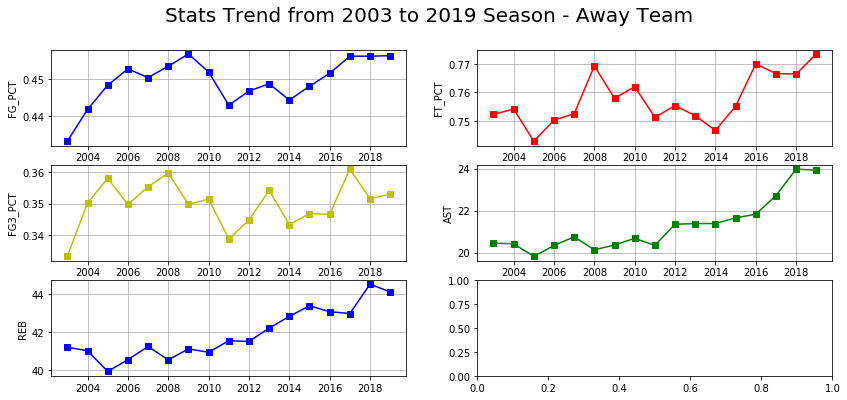

In [29]:
stats_trend_awy = hm_vs_awyStats.groupby('SEASON')['FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', \
                                         'AST_away', 'REB_away'].mean()
fig, axs = plt.subplots(3,2, figsize=(14,6))
fig.suptitle('Stats Trend from 2003 to 2019 Season - Away Team', fontsize=20)
axs[0, 0].plot(stats_trend_awy.index, 'FG_PCT_away', 'bs-', data=stats_trend_awy)
axs[0, 0].set(ylabel="FG_PCT")
axs[0, 0].grid()
axs[0, 1].plot(stats_trend_awy.index, 'FT_PCT_away', 'rs-', data=stats_trend_awy)
axs[0, 1].set(ylabel="FT_PCT")
axs[0, 1].grid()
axs[1, 0].plot(stats_trend_awy.index, 'FG3_PCT_away', 'ys-', data=stats_trend_awy)
axs[1, 0].set(ylabel="FG3_PCT")
axs[1, 0].grid()
axs[1, 1].plot(stats_trend_awy.index, 'AST_away', 'gs-', data=stats_trend_awy)
axs[1, 1].set(ylabel="AST")
axs[1, 1].grid()
axs[2, 0].plot(stats_trend_awy.index, 'REB_away', 'bs-', data=stats_trend_awy)
axs[2, 0].set(ylabel="REB")
axs[2, 0].grid()

### It looks like Rebound, Free Throw Percentage and Assist follow the total score trend graph. Plus, both Home and Away team show very similar graphs.


## <font color="blue"> Now that we checked our dataset and what has contributed to NBA score trend and stats trend, let's dive into our main subject - predicting winning percentage.</font>
<br>
First, let's combine games df with rank df.
Let's pick each teams' final records per seasons. Our games df has data from 2005 season - so we have to construct rank df accordingly.

In [35]:
rank.loc[ (rank['TEAM'] == "L.A. Lakers") & (rank['SEASON_ID']==22018), rank.columns != 'STANDINGSDATE' ].drop_duplicates().iloc[0, :]
#def season_final(s)

TEAM_ID         1610612747
SEASON_ID            22018
CONFERENCE            West
TEAM           L.A. Lakers
G                       82
W                       37
L                       45
W_PCT                0.451
HOME_RECORD          22-19
ROAD_RECORD          15-26
Name: 71962, dtype: object

In [31]:
seasons = rank['SEASON_ID'].values
#seasons = np.apply_along_axis( lambda x : np.where(x > 22000), 0, seasons)
'''
rank_final_rec = rank.loc[ (rank['SEASON_ID']!=12020), rank.columns ]
rank_final_rec = rank_final_record.loc[ (rank_final_rec['SEASON_ID'], rank.columns]
rank_final_rec['SEASON_ID'].value_counts()
'''
seasons

array([12020, 12020, 12020, ..., 22013, 22013, 22013])

In [32]:
game_data2 = game_data[['SEASON', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'PTS_home', \
                  'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away', \
                  'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']]
